<a href="https://colab.research.google.com/github/SMC-AAU-CPH/SPIS/blob/main/03-Fourier-Transform/03-MED-TonicPhasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 3b: EEG Tonic / Phasic Analysis
Signal Processing for Interactive Systems

Cumhur Erkut (cer@create.aau.dk)

Aalborg University Copenhagen

Last edited: 2025-03-05

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft, istft

In [2]:
# @title EEG signal generation
# Remember to read the EEG signal from the file if you have one
# Here we generate a synthetic signal with tonic and phasic components
fs = 256  # Sampling frequency (Hz)
t = np.arange(0, 10, 1/fs)  # 10 seconds of data
tonic = np.sin(2 * np.pi * 0.5 * t)  # Slow tonic component (~0.5 Hz)
phasic = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 20 * t)  # Faster phasic components
signal = tonic + phasic + np.random.normal(0, 0.1, len(t))  # Combined EEG signal


# Use different signal processing methods

In [3]:

# 1. Low-Pass Filter Approach
def lowpass_filter(signal, cutoff, fs, order=4):
    nyquist = fs / 2
    b, a = butter(order, cutoff / nyquist, btype='low')
    return filtfilt(b, a, signal) # zero phase filtering

tonic_lp = lowpass_filter(signal, 1, fs)
phasic_lp = signal - tonic_lp


In [4]:
# 2. Moving Average Approach
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

tonic_ma = moving_average(signal, int(fs / 4))
phasic_ma = signal - tonic_ma


In [5]:
# 3. Short-Time Fourier Transform (STFT) Approach
f, time, Zxx = stft(signal, fs=fs, nperseg=256)
tonic_stft = Zxx.copy()
tonic_stft[np.abs(f) > 1, :] = 0  # Keep only low frequencies
phasic_stft = Zxx.copy()
phasic_stft[np.abs(f) <= 1, :] = 0  # Remove low frequencies
_, tonic_stft_rec = istft(tonic_stft, fs)
_, phasic_stft_rec = istft(phasic_stft, fs)

# Plot Results

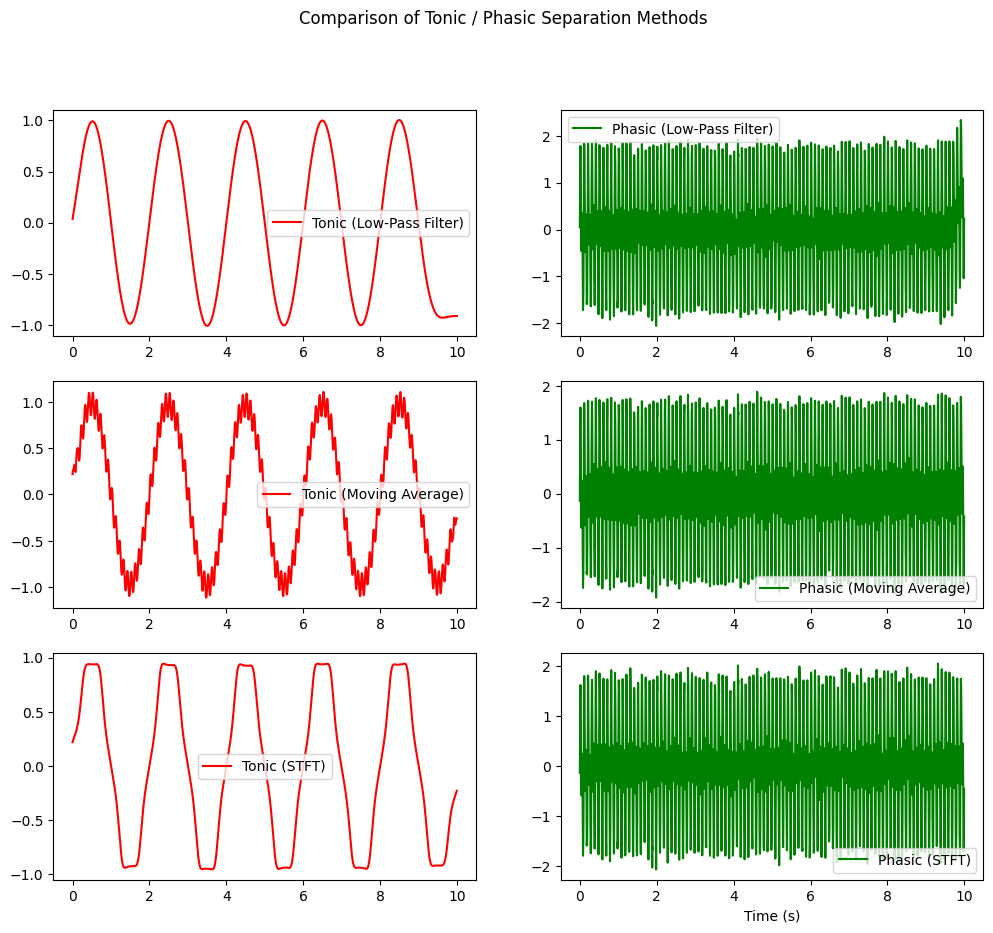

In [6]:

methods = ['Low-Pass Filter', 'Moving Average', 'STFT']
tonic_signals = [tonic_lp, tonic_ma, tonic_stft_rec]
phasic_signals = [phasic_lp, phasic_ma, phasic_stft_rec]

plt.figure(figsize=(12, 10))
for i, method in enumerate(methods):
    plt.subplot(len(methods), 2, 2*i+1)
    plt.plot(t, tonic_signals[i], label=f'Tonic ({method})', color='r')
    plt.legend()

    plt.subplot(len(methods), 2, 2*i+2)
    plt.plot(t, phasic_signals[i], label=f'Phasic ({method})', color='g')
    plt.legend()

plt.xlabel("Time (s)")
plt.suptitle("Comparison of Tonic / Phasic Separation Methods")
plt.show()
